<a href="https://colab.research.google.com/github/rafael84/complexidade-algoritmos/blob/master/Complexidade_de_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complexidade de Algoritmos

É um conceito muito importante para analisarmos a eficiência dos nossos programas.


Vou explicar o que a gente precisa saber em duas partes.

* Nesta **primeira parte** vou abordar uma noção intuitiva sobre a complexidade;
* Na **segunda parte** eu vou passar uma notação matemática que nós utilizamos para expressá-la.

# PARTE I: NOTAÇÃO INTUITIVA

## 1. Recursos Computacionais

Nossos programas exigem dois tipos de recursos do nosso computador:

* O primeiro deles é o **processamento**, que é a capacidade de realizar cálculos do computador;
* O segundo recurso é a capacidade de armazenamento em **memória** do computador

Com estas noções bem claras, vamos tentar calcular de uma maneira bem grosseira, bem aproximada, a quantidade de recursos demandados pelo nosso programa. 

Utilizamos o termo "complexidade" para nos referirmos exatamente a essa quantidade de recursos requeridos.

## 2. Programa vs Algoritmo

Até este momento utilizamos de uma maneira bem informal o termo **"programa"**. 

Programa é basicamente tudo aquilo que nós temos escrito em uma determinada linguagem de programação para ser executado por um computador.

Porém, **"programa"** e **"algoritmo"** não são a mesma coisa.

Por isso, a partir de agora eu vou utilizar o termo **algoritmo**, por ser mais adequado ao assunto que estamos estudando.

## 3. Analisando a Complexidade

Vamos analisar um exemplo de um algoritmo aqui bem simples e curto:

In [0]:
def inverter_lista(lista):
  tamanho = len(lista)
  limite = tamanho//2
  for i in range(limite):
    aux = lista[i]
    lista[i] = lista[tamanho-i-1]
    lista[tamanho-i-1] = aux

inteiros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
inverter_lista(inteiros)
print(inteiros)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


**Observações:**
* Não nos importa que tipo de lista estamos lidando neste momento: string, inteiros, etc.
* Também não nos importa saber de onde vem estes elementos: um arquivo, do usuário, internet, etc.

Estes são aspectos específicos do programa que implementa este algoritmo.

## 3.1. Calculando a mémoria exigida

Vamos observar as variáveis utilizadas pelo algoritmo.

Na função `inverter_lista` temos `5` variáveis:
* `lista`
* `tamanho`
* `limite`
* `i`
* `aux`

Sendo que `lista` é uma variável que, possivelmente, armazena diversos valores internamente. Logo, `lista` possui `n` elementos.

Podemos então definir que a **quantidade de memória** exigida por `inverter_lista` é:

* `= 4 + tamanho`
* `= 4 + n`

## 3.2. Calculando a quantidade de processamento

Fazemos uma **conta aproximada**, considerando as *operações elementares* do algoritmo.

Uma **operação elementar**:
* Número de passos constante;
* Não esconde um outro algoritmo.

Na instrução `lista[i] = lista[tamanho-i-1]` temos pelo menos `3` passos:
* `tamanho-i-1` é uma subtração;
* `lista[tamanho-i-1]` recupera um valor em memória;
* `lista[i] = ...` faz uma atribuição do valor calculado.

Repare que, independente do tamanho da lista, esta linha de código sempre será executada um número fixo de passos.

Podemos considerar esta linha como uma única operação elementar.

Calculando as operações elementares em `inverter_lista`:

* `= 2 + 4 * limite`
* `= 2 + 4 * (tamanho / 2)`
* `= 2 + 4 * (n / 2)`
* `= 2 + 2n`

## 3.3. Formalizando os tipos de complexidade de algoritmos

* Para quantidade de **memória** exigida, chamamos de **Complexidade de Espaço**.
* Para a quantidade de **processamento** necessário para execução, chamamos de **Complexidade de Tempo**.

Quando não for especificado o tipo de complexidade, devemos assumir que estamos falando da **complexidade de tempo**.

Repare que no algoritmo `inverter_lista` ambos os cálculos de complexidade dependem do tamanho da entrada do algoritmo, `lista`. 

Ao tamanho da entrada normalmente associamos `n`.

## 3.4. Classificando a complexidade de tempo

Vimos que o algoritmo `inverter_lista` possui complexidade de tempo `2n + 2`.

Esta complexidade é **linear**, porque esta é uma função de primeiro grau:

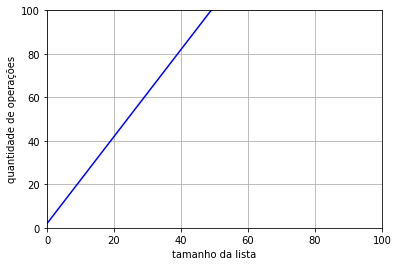

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 100)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("tamanho da lista")
plt.ylabel("quantidade de operações")
plt.grid(True)
plt.plot(n, 2*n + 2, color="blue")
plt.show()

Vamos ver um algoritmo alternativo, que inverte a lista com uma outra estratégia:

In [0]:
def inverter_lista2(lista):
  nova_lista = []
  tamanho = len(lista)
  for i in range(tamanho):
    nova_lista.append(lista[tamanho-i-1])
  return nova_lista

inteiros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
inteiros_invertidos = inverter_lista2(inteiros)
print(inteiros_invertidos)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


Neste algoritmo:
* Complexidade de tempo: `2 + N`
* Complexidade de espaço: `2 + 2*N`

Logo, em termos de espaço, este algoritmo demanda mais recursos, mesmo com menos variáveis declaradas.

Vejamos uma comparação da complexidade de tempo entre os dois algoritmos:

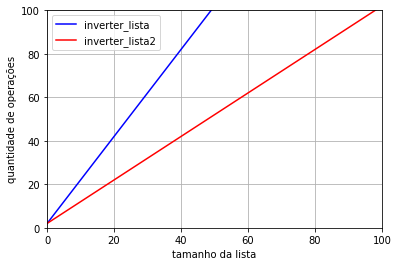

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 100)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("tamanho da lista")
plt.ylabel("quantidade de operações")
plt.grid(True)
plt.plot(n, 2*n + 2, color="blue", label="inverter_lista")
plt.plot(n, 2+n, color="red", label="inverter_lista2")
plt.legend()
plt.show()

É possível perceber que ambas as soluções tem complexidade **linear**.

Para resolver este tipo de problema, inverter uma lista, uma solução linear é a melhor que vamos conseguir, pois precisamos "passar" por cada elemento da lista pelo menos uma vez.

# PARTE II: Notação Assintótica

Para analisar se um algoritmo é **mais** ou **menos** eficiente que o outro, precisamos:
* Analisar **como a complexidade evolui** (muda) com o tamanho da entrada.
* A expressão de complexidade que obtemos deve ser independente da **linguagem de progração** e do **computador** onde o código é executado.

O foco é o **comportamento do algoritmo**, e não o tempo exato de sua execução.

Consideremos a seguinte expressão de complexidade:

```
T(n) = 2n + 2
```

* Onde `T(n)` indica que esta é uma expressão de **complexidade de tempo**.
* A expressão tem dois termos, `2n` e `2`.

## 1. Encontrando o termo dominante

Vamos analisar a importância do segundo termo, `2`.

* Quando `n`, que representa a quantidade de itens na `lista` de entrada, é um número pequeno, sua relevância parece ser grande. 

Por exemplo, se `n` for `4`, temos:
* `= 2n + 2`
* `= 2*4 + 2`
* `= 8 + 2`
* `= 10`

Neste caso, o total é `10`, portanto `2` equivale a `20%` deste valor.

Porém, vejamos o que acontece se `n` for um número maior, como `1000`, por exemplo:
* `= 2n + 2`
* `= 2*1000 + 2`
* `= 2000 + 2`
* `= 2002`

Neste segundo caso o total é `2002`, com `2` agora contribuindo com apenas `0.1%` deste valor.

Assim, podemos descartar o `2`, ficando apenas com `2n`, que é o **termo dominante** nesta expressão.

## 2. Removendo a constante multiplicativa

Para chegar na notação desejada, ainda falta mais um passo: eliminar a constante que multiplica `n`.

Neste caso, é o `2`. Ficamos então apenas com `n`.

## 3. Notação do O grande (Big O notation)

Uma vez que temos uma expressão que é uma função de `n`, podemos agora utilizar a notação do **O grande** (Big O):

Ou seja, `T(n) = 2n + 2` equivale a `O(n)`.

Nem todo algoritmo possui esta complexidade linear.
Vejamos outro exemplo:

In [0]:
def tem_duplicados(lista):
  for i in range(len(lista)-1):
    for j in range(i+1, len(lista)):
      if lista[i] == lista[j]:
        return True
  return False

print(tem_duplicados("banana")) # não executa todas as operações, termina antes
print(tem_duplicados("python")) # executa todas as operações

True
False


Repare que, nos exemplos acima, a string `banana` como entrada para o algoritmo faz com que nem todas as operações sejam executadas, isto porque a string contém letras duplicadas.

Já com a palavra `python`, é diferente. Apesar de ter a mesma quantidade de caracteres, esta palavra não contém letras duplicadas. Neste caso, todas as comparações precisam ser feitas.

Quando analisamos a complexidade de um algoritmo, nos interessa mais saber este último cenário que reflete o máximo de operações executadas, isto é, o **pior cenário**.

Para o algoritmo `tem_duplicados` temos a seguinte expressão de complexidade:

```
T(n) = n * (n-1) / 2
T(n) = (n^2 - n) / 2
T(n) = (n^2 - n) * 0.5
```

Observamos que o termo nominante da expressão é `n^2`, portanto podemos afirmar que:

```
T(n) = (n^2 - n) * 0.5 => O(n^2)
```

A complexidade `n^2` é demonimada **quadrática**.

Vejamos a comparação com uma função linear:

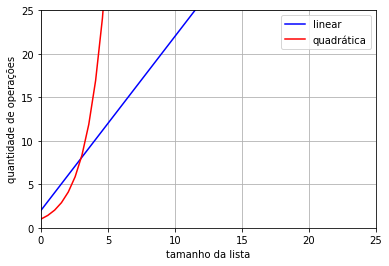

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0, 25)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.xlabel("tamanho da lista")
plt.ylabel("quantidade de operações")
plt.grid(True)
plt.plot(n, 2*n + 2, color="blue", label="linear")
plt.plot(n, np.power(2, n), color="red", label="quadrática")
plt.legend()
plt.show()

Fácil perceber que algoritmos complexidade quadrática são bem menos eficientes que os lineares.

Ranking de complexidade:

| Função   | Nome          |
|----------|---------------|
| 1        | constante     |
| log n    | logarítmica   |
| n        | linear        |
| n log n  | linearítimica |
| n^2      | quadrática    |
| n^3      | cúbica        |
| 2^       | exponencial   |
| n!       | fatorial      |

Para mais comparações, visite https://www.bigocheatsheet.com/

**Referências**: 
* https://www.youtube.com/watch?v=KVlGx-9CuO4
* https://www.youtube.com/watch?v=UQzCFkRbIrE
* https://www.youtube.com/watch?v=uxtO9pBTnzw
* https://pt.khanacademy.org/computing/computer-science/algorithms/asymptotic-notation/a/big-o-notation
* https://www.bigocheatsheet.com/